<a href="https://colab.research.google.com/github/CSID-DGU/2021-1-OSSP1-Debugger-4/blob/face-recognization/imagemerge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


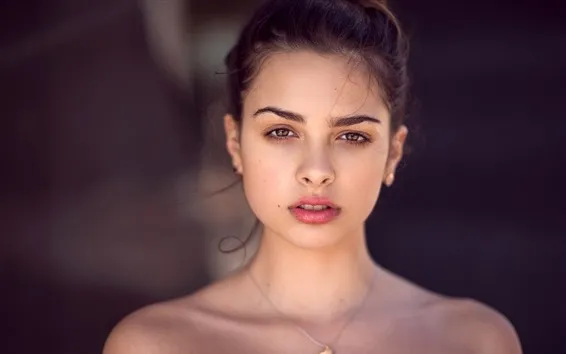

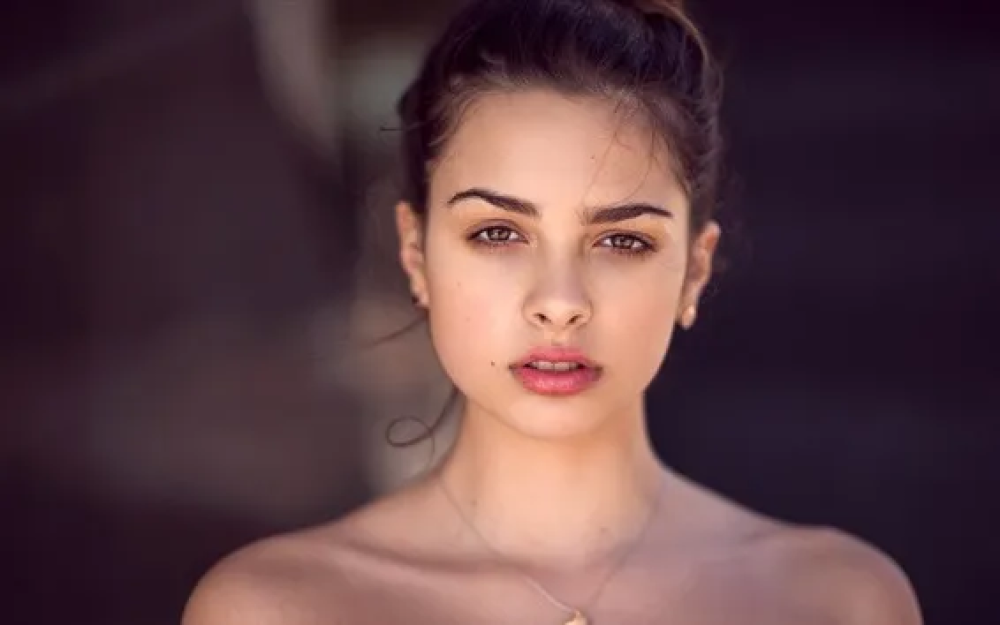

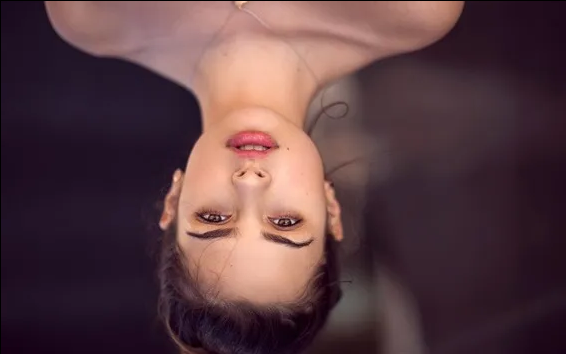

In [ ]:
import cv2
import imutils #복잡하고 사용성이 떨어지는 것을 보완해주는 라이브러리
from google.colab.patches import cv2_imshow


image = cv2.imread('/gdrive/My Drive/Colab Notebooks/face-recognition/face.webp')
new_image = imutils.resize(image,width=1000)
rotate_image = imutils.rotate(image,angle=180)
cv2_imshow(image)
cv2_imshow(new_image)
cv2_imshow(rotate_image)

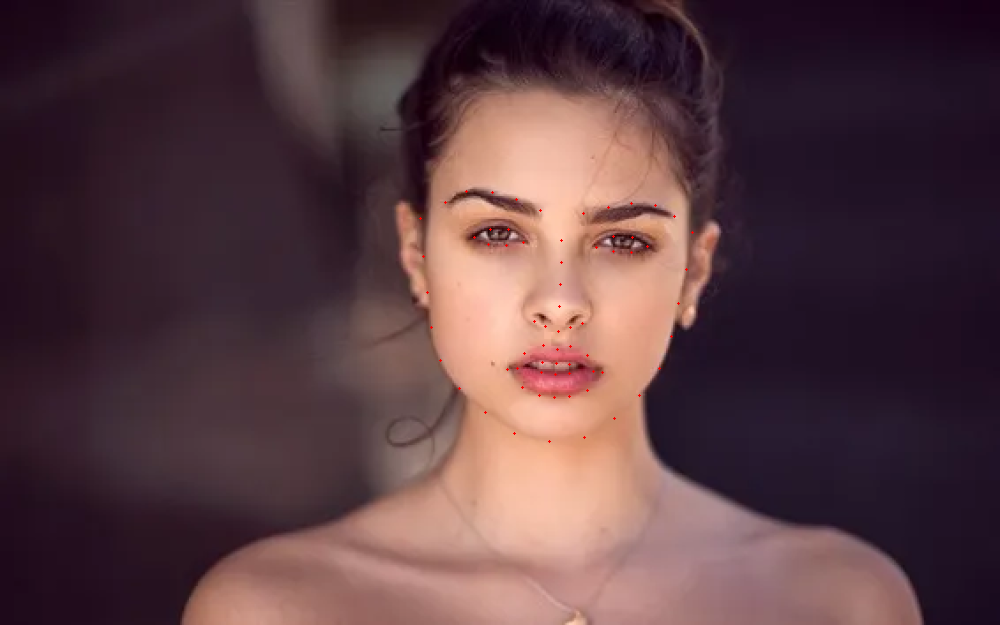

In [ ]:
from imutils import face_utils
from google.colab.patches import cv2_imshow
import numpy as np
import imutils
import dlib
import cv2


def show_raw_detection(image, detector, predictor):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
  # detect faces in the grayscale image
  rects = detector(gray, 1)

  # loop over the face detections
  for (i, rect) in enumerate(rects):
    # determine the facial landmarks for the face region, then 
    # convert the facial landmark (x, y)-coordinates to a NumPy 
    # array 
    shape = predictor(gray, rect) 
    shape = face_utils.shape_to_np(shape)
  
    # convert dlib's rectangle to a OpenCV-style bounding box 
    # [i.e., (x, y, w, h)], then draw the face bounding box 
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    #cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2) 
  
    # show the face number
    #cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
  
    # loop over the (x, y)-coordinates for the facial landmarks
    # and draw them on the image
    for (x, y) in shape:
      cv2.circle(image, (x, y), 1, (0, 0, 255), -1) 
    
  # show the output image with the face detections + facial landmarks
  cv2_imshow(image)
  cv2.waitKey(0)
  
    
# initialize dlib's face detector (HOG-based) and then create 
# the facial landmark predictor 
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/gdrive/My Drive/Colab Notebooks/face-recognition/shape_predictor_68_face_landmarks.dat')

# load the input image, resize it, and convert it to grayscale
image = cv2.imread('/gdrive/My Drive/Colab Notebooks/face-recognition/face.webp')
image = imutils.resize(image, width=1000)
show_raw_detection(image, detector, predictor)